## NFA Diagram Example

In [1]:
from dataclasses import dataclass
from collections import defaultdict
from gvdot import Dot, Markup, Nonce

# Example images are saved to images/ if it exists.
import os; save_images = os.path.isdir("images")

### Representation

- `alphabet` is the input alphabet

- `delta["q"][0]` is the list of states reached from state $q$ by epsilon
transitions, and `delta["q"][i]` is the list of states reached from $q$ by
symbol `alphabet[i-1]`.

- `final` is the list of final states

- `start` is the start state

In [2]:
@dataclass
class NFA:
    alphabet : str
    delta    : dict[str, list[list[str]]]
    final    : list[str]
    start    : str

### Example Instance

In [3]:
example = NFA("01", {
    "s0": [["q0", "r0"], [], []],
    "q0": [[], ["q1"], ["q0"]],
    "q1": [[], ["q1"], ["q2"]],
    "q2": [[], ["q3"], ["q0"]],
    "q3": [[], ["q1"], ["q4"]],
    "q4": [[], ["q4"], ["q4"]],
    "r0": [[], ["r0"], ["r1"]],
    "r1": [[], ["r0"], ["r2"]],
    "r2": [[], ["r3"], ["r1"]],
    "r3": [[], ["r3"], ["r3"]],
}, ["q4","r0","r1","r2"], "s0")

### Implementation

#### Theme Definition

In [4]:
nfa_theme = (Dot()
    .all_default(fontsize=12)
    .node_default(shape="circle", style="filled", fillcolor="khaki")
    .node_role("init", label="", shape="none", width=0, height=0)
    .node_role("final", shape="doublecircle", penwidth=1.25)
    .graph(rankdir="LR", labelloc="t", fontsize=16))

#### Diagram Construction

In [ ]:
def nfa_diagram(nfa:NFA, title:str):

    dot = Dot(directed=True).use_theme(nfa_theme)
    dot.graph(label=Markup(f"<b>{title}</b>"))

    init_id = Nonce()
    dot.node(init_id, role="init")
    dot.edge(init_id, nfa.start)

    for state in nfa.final:
        dot.node(state, role="final")

    for state, transitions in nfa.delta.items():
        merged = defaultdict(list)
        for index, targets in enumerate(transitions):
            for target in targets:
                merged[target].append(
                    nfa.alphabet[index-1] if index > 0 else '&epsilon;')
        for target, symbols in merged.items():
            dot.edge(state, target, label=", ".join(symbols))

    return dot

### Rendering

#### Showing in the Notebook

NOTE: If you are viewing this as a preview on GitHub, GitHub may not render the
epsilon characters correctly.  To see a correct rendering, run the notebook or
view [nfa.svg](images/nfa.svg).

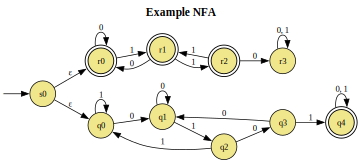

In [47]:
nfa_diagram(example,"Example NFA").show(size="5,5")

#### Saving as an SVG File

In [48]:
if save_images:
    nfa_diagram(example, "Example NFA").save("images/nfa.svg")

#### Saving as a PNG File

We specify dot per inch to create a higher resolution image.

In [49]:
if save_images:
    nfa_diagram(example, "Example NFA").save("images/nfa.png", dpi=300)

#### The DOT Language Representation

In [50]:
nfa_diagram(example, "Example NFA").show_source()

digraph {

    graph [fontsize=12]
    node [fontsize=12 shape=circle style=filled fillcolor=khaki]
    edge [fontsize=12]

    rankdir=LR
    labelloc=t
    fontsize=16

    _nonce_1 [label="" shape=none width=0 height=0]
    q4 [shape=doublecircle penwidth=1.25]
    r0 [shape=doublecircle penwidth=1.25]
    r1 [shape=doublecircle penwidth=1.25]
    r2 [shape=doublecircle penwidth=1.25]

    _nonce_1 -> s0
    s0 -> q0 [label="&epsilon;"]
    s0 -> r0 [label="&epsilon;"]
    q0 -> q1 [label="0"]
    q0 -> q0 [label="1"]
    q1 -> q1 [label="0"]
    q1 -> q2 [label="1"]
    q2 -> q3 [label="0"]
    q2 -> q0 [label="1"]
    q3 -> q1 [label="0"]
    q3 -> q4 [label="1"]
    q4 -> q4 [label="0, 1"]
    r0 -> r0 [label="0"]
    r0 -> r1 [label="1"]
    r1 -> r0 [label="0"]
    r1 -> r2 [label="1"]
    r2 -> r3 [label="0"]
    r2 -> r1 [label="1"]
    r3 -> r3 [label="0, 1"]

    label=<<b>Example NFA<br/></b>>
}